In [1]:
#Linear Regression and predicting values using machine learning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs

# Import TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Ensure only critical errors are shown

# Verify TensorFlow installation
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.2


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
combined_cycle_power_plant = fetch_ucirepo(id=294) 
  
# data (as pandas dataframes) 
X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets 

df = pd.concat([X,y],axis=1)
df


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


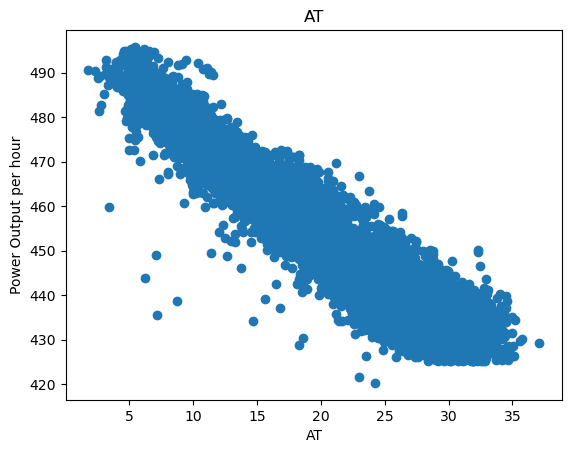

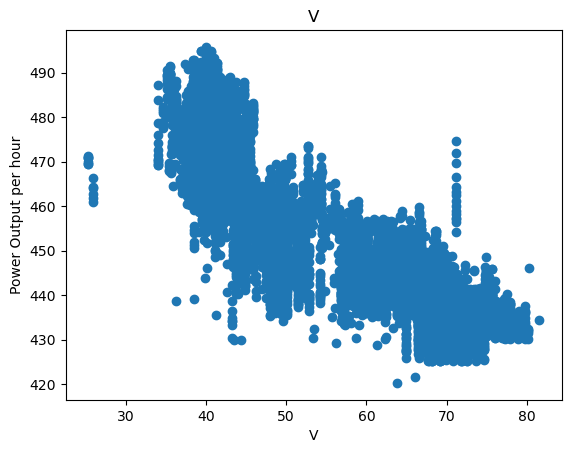

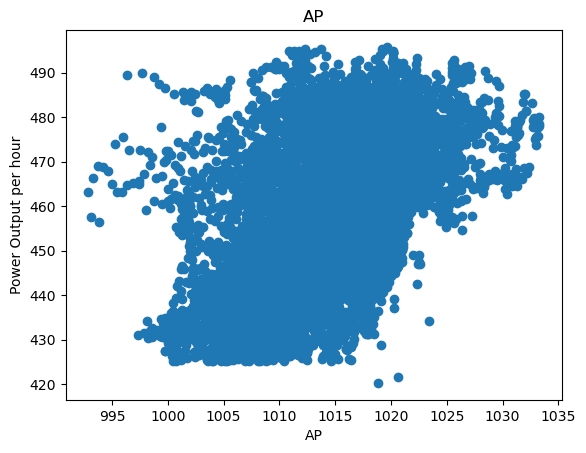

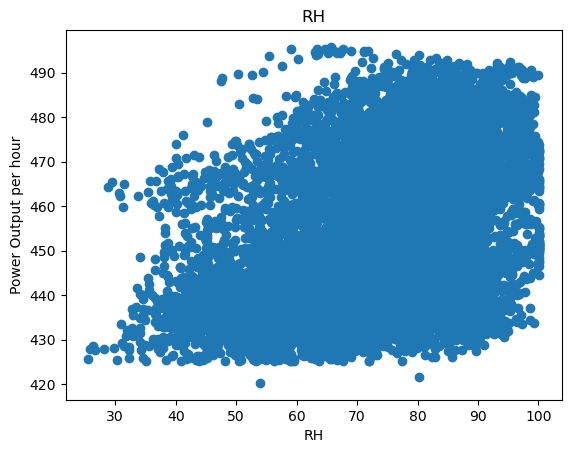

In [9]:
for label in df.columns[:-1]:
    plt.scatter(df[label],df["PE"])
    plt.title(label)
    plt.ylabel("Power Output per hour")
    plt.xlabel(label)
    plt.show()

In [14]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
                                        

In [12]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [15]:
_, X_train_AT, y_train_AT = get_xy(train, "PE", x_labels=["AT"])
_, X_valid_AT, y_valid_AT = get_xy(valid, "PE", x_labels=["AT"])
_, X_test_AT, y_test_AT = get_xy(test, "PE", x_labels=["AT"])

In [18]:
AT_reg = LinearRegression()
AT_reg.fit(X_train_AT,y_train_AT)
AT_reg.score(X_test_AT,y_test_AT)

0.9025547942294769

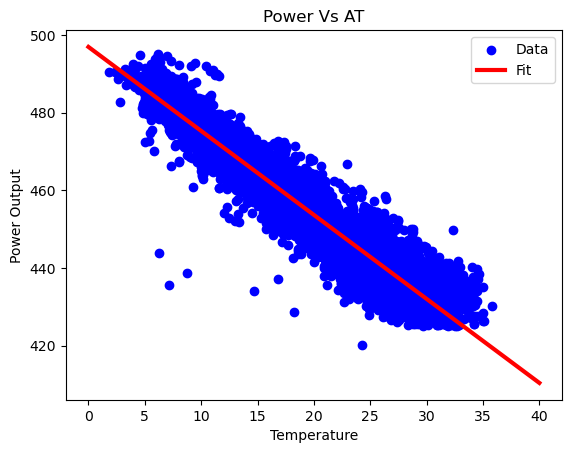

In [22]:
plt.scatter(X_train_AT,y_train_AT,label="Data",color="blue")
x = tf.linspace(0,40,80)
plt.plot(x,AT_reg.predict(np.array(x).reshape(-1,1)),label = "Fit",color="red",linewidth=3)
plt.legend()
plt.title("Power Vs AT")
plt.ylabel("Power Output")
plt.xlabel("Temperature")
plt.show()

In [23]:
#Multiple Linear Regression

In [24]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "PE", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "PE", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "PE", x_labels=df.columns[:-1])

In [25]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all)

0.9270897679906259

In [26]:
y_pred_lr = all_reg.predict(X_test_all)


In [27]:
#Regression with neural networks.

In [32]:
AT_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
AT_normalizer.adapt(X_train_AT.reshape(-1))

AT_nn_model = tf.keras.Sequential([
    AT_normalizer,
    tf.keras.layers.Dense(1)
])

In [33]:
AT_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [37]:
history = AT_nn_model.fit(
    X_train_AT.reshape(-1), y_train_AT,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid_AT, y_valid_AT)
)

KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
#Neural Net